<a href="https://colab.research.google.com/github/eldercamposds/Chunr_MachineLearning/blob/main/5_Churn_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

uri = "https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv"
dados = pd.read_csv(uri)

In [ ]:
dados.shape

(7043, 18)

In [ ]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


# Trduzindo variavés

In [ ]:
traducao_dic = {
    'Sim' : 1,
    'Nao' : 0 
}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


#Trasnfomando a tabela

In [ ]:
#transformação pelo get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))

#junção dos dados transformados com os que ja tinhamos
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)

In [ ]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
dados.shape

(7043, 18)

In [ ]:
pd.set_option('display.max_columns', 39)#mostrar todas as colunas

In [ ]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
dados_final.shape

(7043, 39)

In [ ]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]#dados da cliente que precisamos calcular o churn


#Balanceamento 

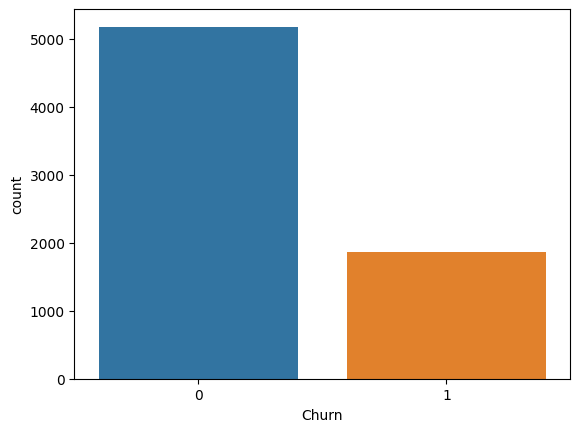

In [ ]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

Analisando o gráfico, podemos perceber que nossa variável está desbalanceada e precisamos tratar isso. Para realizar o balanceamento dos dados, utilizaremos uma técnica chamada de Oversampling, que consiste em realizar a criação de novas observações da classe quando há menos amostras, tendo como objetivo igualar a proporção entre as categorias.

Uma das técnicas de oversampling muito utilizada é a SMOTE. Sua ideia consiste em criar observações intermediárias entre os dados que estão próximos. Por exemplo, se minutos totais por dia são 129.1 e 146.3, então será criada uma amostra com os minutos totais por dia com 137.7. Lembrando que não é necessariamente a média entre as amostras.

In [ ]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']
type(y)

pandas.core.series.Series

In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)# Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X,y)# Realiza a reamostragem do conjunto de dados

In [ ]:
dados_final = pd.concat([X, y], axis=1)# Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


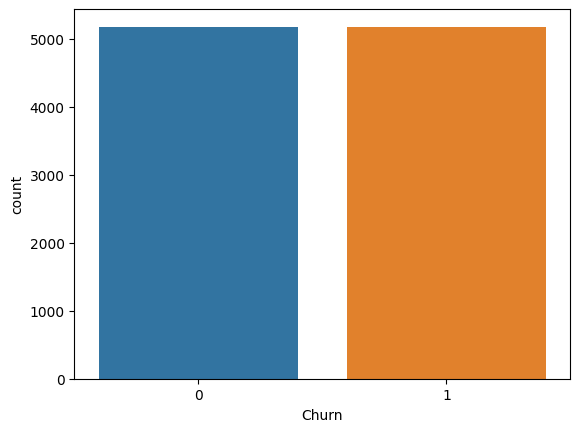

In [ ]:
ax = sns.countplot(x='Churn', data=dados_final)# plotando a variável target balanceada.

#KNN

No algoritmo KNN, para que seja feita a classificação dos registros com base nos vizinhos mais próximos, é necessário utilizar alguma medida para identificar o quão próximo o registro está dos seus vizinhos. Existem diversas medidas para se avaliar essa proximidade entre variáveis numéricas que recebem o nome de medidas de distância. Quanto maior o valor dessa medida, mais distante um elemento está do outro, ou seja, menor a similaridade entre eles.

* Distância Euclidiana
A medida de distância mais conhecida e mais utilizada é a distância euclidiana. Ela consiste em subtrair as coordenadas de uma observação pela outra observação, elevar ao quadrado os resultados, somar todos os valores e extrair a raiz quadrada.


> 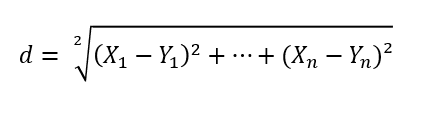



* Distância de Manhattan
Uma distância que considera apenas a soma dos módulos das diferenças entre cada par de coordenadas.

>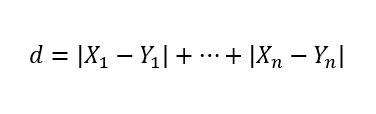

* Distância de Minkowski
Uma medida de distância que é a generalização de outras distâncias, como a distância euclidiana e a de Manhattan. Consiste em extrair o módulo da diferença entre cada par de coordenadas elevando o resultado a m, realizar a soma de todos os termos e, por fim, tirar a raiz m-ésima, em que m é um número qualquer. A distância euclidiana é um caso à parte quando m é igual a 2 e a distância de Manhattan é um caso à parte quando m é igual a 1.

>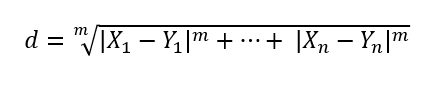

* Distância de Chebyshev
É uma medida de distância que considera apenas o valor máximo entre os módulos das diferenças entre as variáveis. Dessa forma, leva em consideração apenas a variável que possui a maior diferença de valores entre as duas observações.

> 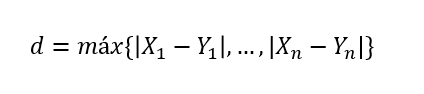





---


Existem diversas outras medidas de distância que podem ser calculadas e cada uma delas impacta diretamente no resultado do modelo. As distâncias apresentadas aqui podem ser utilizadas no algoritmo KNN do scikit-learn, sendo a distância de Minkowski a medida de distância padrão ao instanciar o algoritimo.

Podemos modificar a medida de distância utilizando o argumento metric da função sklearn.neighbors.KNeighborsClassifier. Com base nas medidas que foram apresentadas no texto, o parâmetro pode receber os seguintes valores:

* “euclidean” para a distância euclidiana;
* “manhattan” para a distância de Manhattan;
* “minkowski” para a distância de Minkowski;
* “chebyshev” para a distância de Chebyshev.

In [ ]:
Xmaria# cliente a ter o churn identificado

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [ ]:
#divisão de inputs e outputs
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#normalizando o x
norm = StandardScaler()

X_normalizado = norm.fit_transform(X) 
X_normalizado

array([[ 1.26542767, -0.52771004, -3.06083934, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       ...,
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
        -0.47912706, -0.4360152 ]])

In [ ]:
X_normalizado[0]

array([ 1.26542767, -0.52771004, -3.06083934,  0.81482091, -0.41318358,
       -1.10771815, -1.3217706 , -0.88447396,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.86827317, -0.44617598,
       -0.51721942, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
       -0.44617598, -0.64211419,  0.87979784, -0.44617598, -0.52426638,
        1.18690873, -0.44617598, -0.77707385,  1.20311799, -0.44617598,
       -0.78976268, -0.44648735,  0.73788726, -0.41989297, -0.42576817,
        1.30373042, -0.47912706, -0.4360152 ])

In [ ]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns)) # Essa função só funciona em dados de duas dimensões
Xmaria_normalizado

array([[-0.79024667, -0.52771004,  0.32670777,  0.81482091, -0.41318358,
        -1.14938255, -0.97236043,  1.13061554, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.86827317, -0.44617598,
        -0.51721942, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
         2.24126814, -0.64211419, -1.13662476,  2.24126814, -0.52426638,
         1.18690873, -0.44617598, -0.77707385, -0.83117367, -0.44617598,
         1.26620316, -0.44648735, -1.35522058,  2.38155929, -0.42576817,
        -0.76702973, -0.47912706,  2.293498  ]])

##Distência Euclidiana

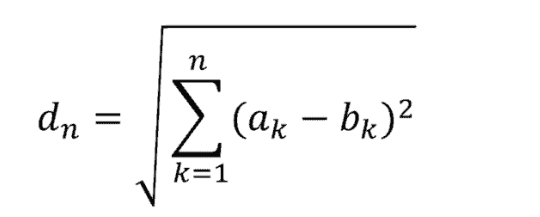



In [ ]:
import numpy as np

In [ ]:
a = Xmaria_normalizado

In [ ]:
b = X_normalizado[0]

In [ ]:
#1 - subtração
a - b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.0416644 ,  0.34941017,  2.0150895 , -3.49991084,  0.        ,
        -2.17376025,  2.00184354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.68744412,  0.        , -2.01642259,  2.68744412,  0.        ,
         0.        ,  0.        ,  0.        , -2.03429166,  0.        ,
         2.05596584,  0.        , -2.09310784,  2.80145225,  0.        ,
        -2.07076016,  0.        ,  2.72951321]])

In [ ]:
# exponenciação
np.square(a-b)

array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73592202e-03, 1.22087466e-01, 4.06058568e+00,
        1.22493759e+01, 0.00000000e+00, 4.72523363e+00, 4.00737757e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.22235589e+00, 0.00000000e+00, 4.06596007e+00, 7.22235589e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13834258e+00, 0.00000000e+00, 4.22699553e+00, 0.00000000e+00,
        4.38110042e+00, 7.84813473e+00, 0.00000000e+00, 4.28804763e+00,
        0.00000000e+00, 7.45024235e+00]])

In [ ]:
# - somatorio
np.sum(np.square(a-b))

91.7112036526817

In [ ]:
#Raiz
np.sqrt(91.7112036526817)

9.576596663360199

In [ ]:
#completo
np.sqrt(np.sum(np.square(a-b)))

9.576596663360199

##Treinos e testes

In [ ]:
#biblioteca para divisão de dados
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123) 

In [ ]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [ ]:
#biblioteca para criar o modelo
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#instanciar o modelo - por padrão são 5 vizinhos
knn = KNeighborsClassifier(metric='euclidean')

In [ ]:
#treinando o modelo
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [ ]:
#testando o modelo
predito_knn = knn.predict(X_teste)
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

#Bernoulli

In [ ]:
#Bliblioteca para criarmos o modelo
from sklearn.naive_bayes import BernoulliNB

In [ ]:
np.median(X_treino)

-0.4461759755508453

In [ ]:
#criando o modelo
bnb = BernoulliNB()#parametro para converter os dados não binaários em binários

In [ ]:
bnb.fit(X_treino, y_treino)

BernoulliNB()

In [ ]:
predito_Bnb = bnb.predict(X_teste)

In [ ]:
predito_Bnb

array([1, 0, 0, ..., 1, 1, 1])

##Decision Tree

In [ ]:
#importando biblioteca para modelo de decision tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#instanciando o modelo
dtc =  DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
dtc.fit(X_treino, y_treino)#treino do modelo

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
#verificar a importânica de cada atributo
dtc.feature_importances_

array([0.02100894, 0.01395648, 0.0068095 , 0.01986065, 0.01886452,
       0.1627932 , 0.22212421, 0.00939177, 0.00344576, 0.01039829,
       0.0019815 , 0.03128648, 0.00065123, 0.00849934, 0.        ,
       0.01698366, 0.00622973, 0.        , 0.00964718, 0.01267467,
       0.00027769, 0.00770208, 0.01299062, 0.00368329, 0.02047256,
       0.00371587, 0.        , 0.00156955, 0.00671244, 0.0003825 ,
       0.01126638, 0.03622159, 0.16358635, 0.07445054, 0.01758995,
       0.02117825, 0.02183557, 0.01975766])

In [ ]:
predito_ArvoreDecisao = dtc.predict(X_teste)
predito_ArvoreDecisao

array([0, 0, 0, ..., 1, 1, 1])

#Validação

##Matriz de confusão

In [ ]:
#biblioteca da matrix de confusão
from sklearn.metrics import confusion_matrix

In [ ]:
#modelo knn
print(confusion_matrix(y_teste, predito_knn))

[[1242  327]
 [ 248 1288]]


In [ ]:
#modelo BNB
print(confusion_matrix(y_teste, predito_Bnb))

[[1091  478]
 [ 241 1295]]


In [ ]:
#modelo decision tree
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1250  319]
 [ 275 1261]]


###Acuracia

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#modelo KNN
print(accuracy_score(y_teste, predito_knn))

0.8148148148148148


In [ ]:
#modelo Bernoulli de naive bayes
print(accuracy_score(y_teste, predito_Bnb))


0.768438003220612


In [ ]:
#modelo deciison tree
print(accuracy_score(y_teste, predito_ArvoreDecisao))

0.808695652173913


###Precisão

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
#modelo KNN
print(precision_score(y_teste, predito_knn))

0.7975232198142415


In [ ]:
#modelo Bernoulli de naives bayes
print(precision_score(y_teste, predito_Bnb))

0.730400451212634


In [ ]:
#modelo Dcision Tree
print(precision_score(y_teste, predito_ArvoreDecisao))

0.7981012658227848


###Recal

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
#modelo KNN
print(recall_score(y_teste, predito_knn))

0.8385416666666666


In [ ]:
#modelo Bernoulli de naive bayes
print(recall_score(y_teste, predito_Bnb))

0.8430989583333334


In [ ]:
#modelo Decision Tree
print(recall_score(y_teste, predito_ArvoreDecisao))

0.8209635416666666


#Escolhendo o modelo

In [ ]:
#modelo Dcision Tree
print(f"Modelo decision tree: {precision_score(y_teste, predito_ArvoreDecisao)*100:.2f}%")
#modelo Bernoulli de naives bayes
print(f"Modelo Bernoulli de Naives Bayes: {precision_score(y_teste, predito_Bnb)*100:.2f}%")
#modelo KNN
print(f"Modelo KNN: {precision_score(y_teste, predito_knn)*100:.2f}%")


Modelo decision tree: 79.81%
Modelo Bernoulli de Naives Bayes: 73.04%
Modelo KNN: 79.75%
